# 0. libraries

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=None
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/tmp/ipykernel_24640/3892766976.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# 1. Check Dataset

In [2]:
# import zipfile
# zipfile.ZipFile("/home/wonhong/.kaggle/titanic.zip").extractall("./")

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.shape, test.shape

((891, 12), (418, 11))

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Features

featNAME | dtype | description | feature type
---|---|---|---
PID | int | passenger UID | continuous
**Survived** | int | is survived  | 2-categorical
Pclass | int | ticket class | 3-categorical
Name | str | passenger name | multi-categorical
Sex | str | gender | 2-categorical
Age | float | age | continous
SibSp | int | # of SibSp | quantitative
Parch | int | # of Parch | quantitative
Ticket | str | Ticket id | multi-categorical
Fare | float | fee | continous
Cabin | str | 객실 번호 | unique
Embarked | str | 탑승 항구 | 3-categorical


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
# null check
display(train.isna().sum())
display(train.isna().sum()/train.shape[0] * 100)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
display(test.isna().sum())
display(test.isna().sum()/test.shape[0] * 100)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

0    0.616162
1    0.383838
Name: Survived, dtype: float64

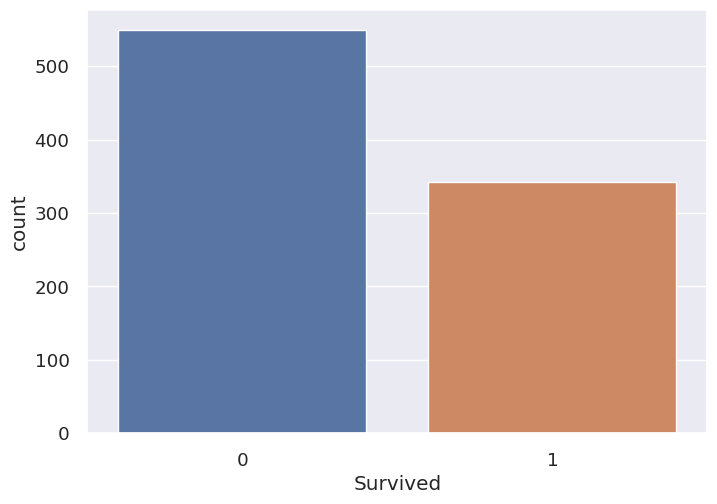

In [11]:
# label distribution
display(train['Survived'].value_counts(normalize=True))
sns.countplot(data=train, x='Survived')
plt.show()

# 2. EDA

### 1. Pclass

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


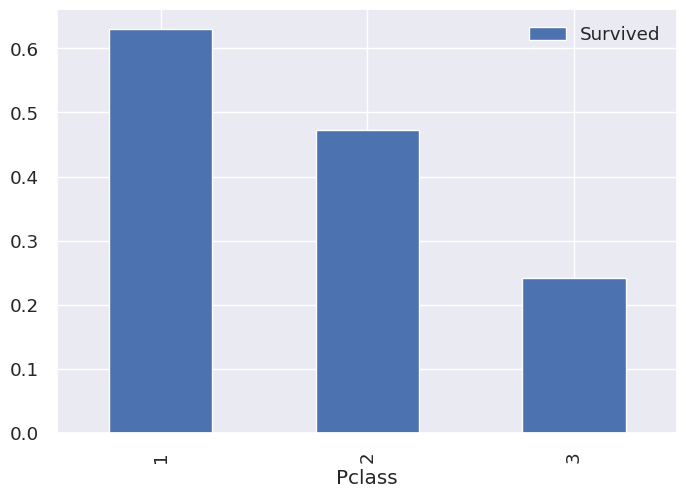

In [12]:
display(pd.crosstab(train['Pclass'], train['Survived'], margins=True))

train[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False).plot(kind='bar')
plt.show()

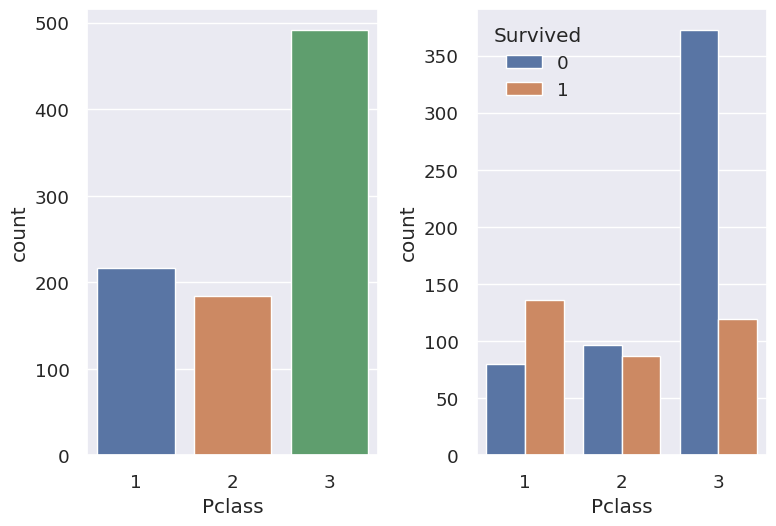

In [13]:
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='Pclass')

plt.subplot(1, 2, 2)
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.tight_layout()
plt.show()

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


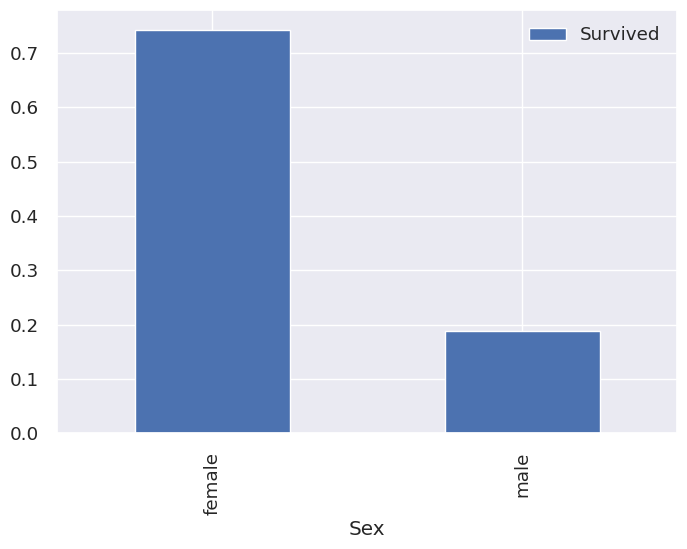

In [14]:
display(pd.crosstab(train['Sex'], train['Survived'], margins=True))

train[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False).plot(kind='bar')
plt.show()

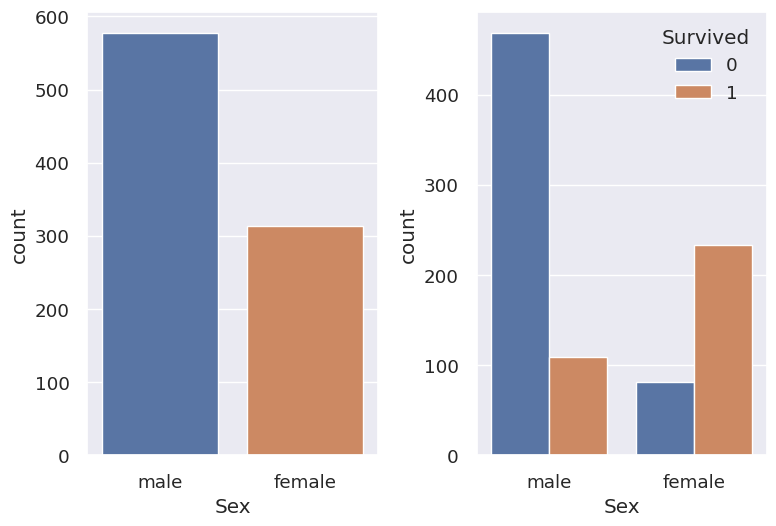

In [15]:
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='Sex')

plt.subplot(1, 2, 2)
sns.countplot(data=train, x='Sex', hue='Survived')
plt.tight_layout()
plt.show()

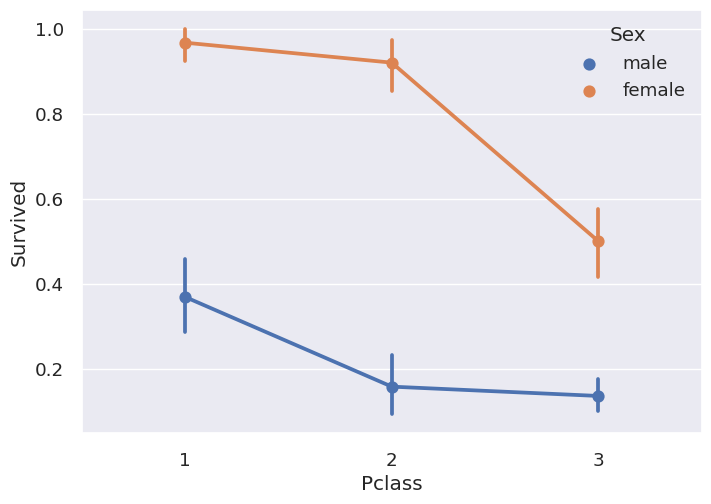

In [16]:
# Pclass & Sex 

sns.pointplot(data=train, x='Pclass', y='Survived', hue='Sex')
plt.show()

In [17]:
train['Age'].max(), train['Age'].min(), train['Age'].mean()

(80.0, 0.42, 29.69911764705882)

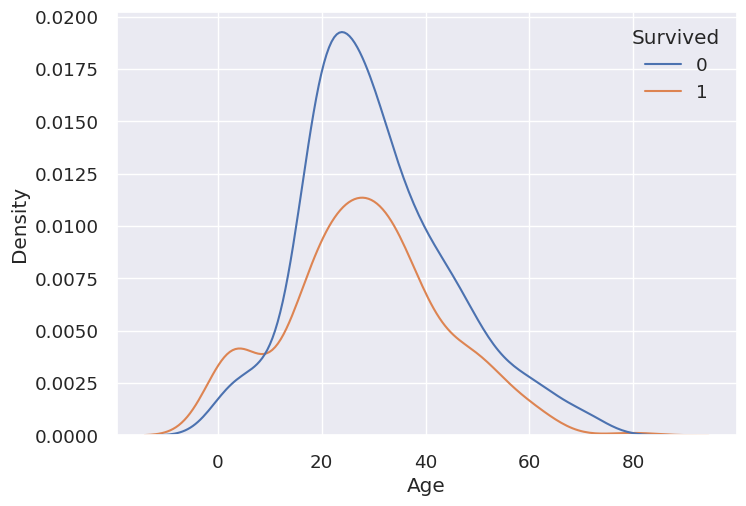

In [18]:
sns.kdeplot(data=train, x='Age', hue='Survived', common_norm=True)
plt.show()

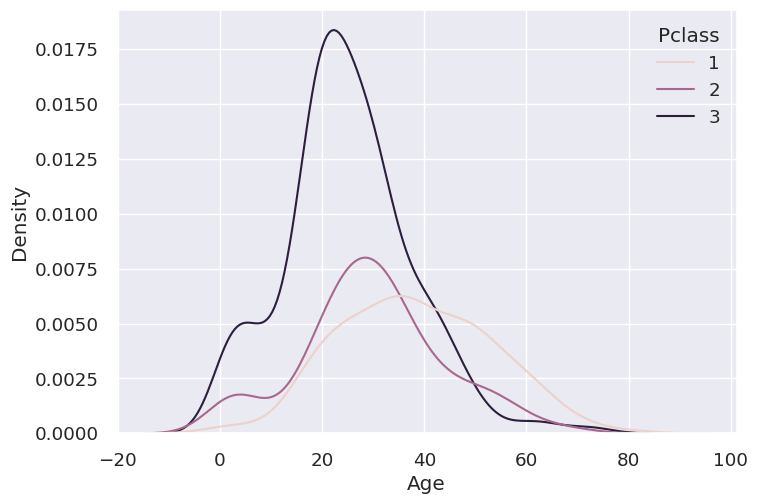

In [19]:
sns.kdeplot(data=train, x='Age', hue='Pclass', common_norm=True)
plt.show()

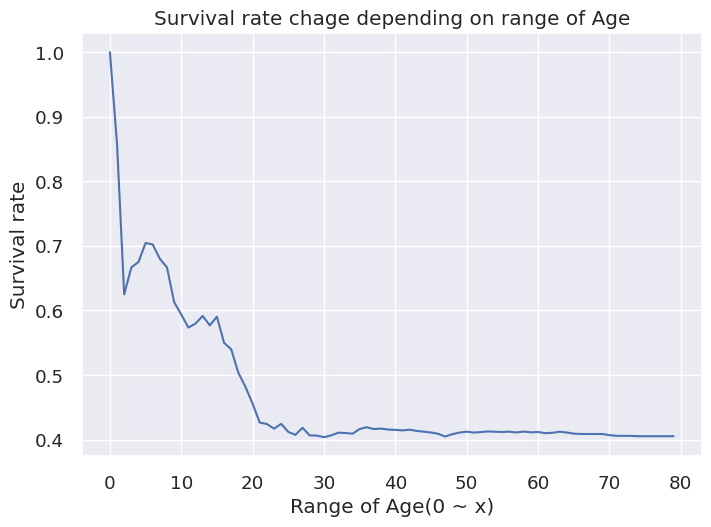

In [20]:
cummulate_survival_ratio = []
for i in range(1, int(train['Age'].max())+1):
    cummulate_survival_ratio.append(train.loc[train['Age'] < i, 'Survived'].sum() / len(train.loc[train['Age']<i]))
    
plt.plot(cummulate_survival_ratio)
plt.title("Survival rate chage depending on range of Age")
plt.ylabel("Survival rate")
plt.xlabel("Range of Age(0 ~ x)")
plt.show()

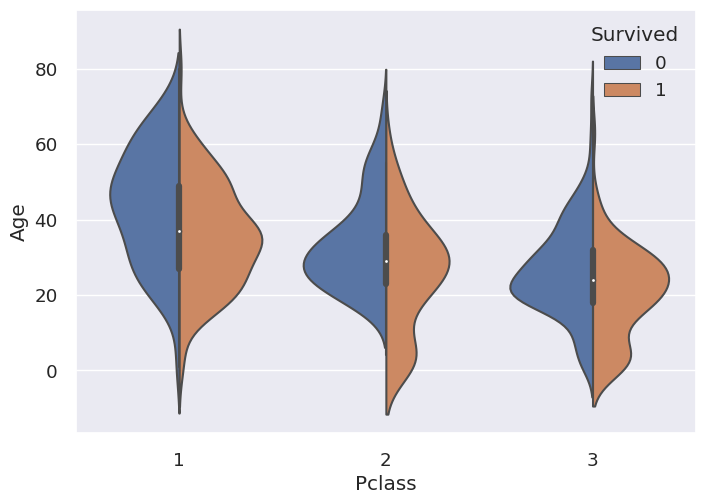

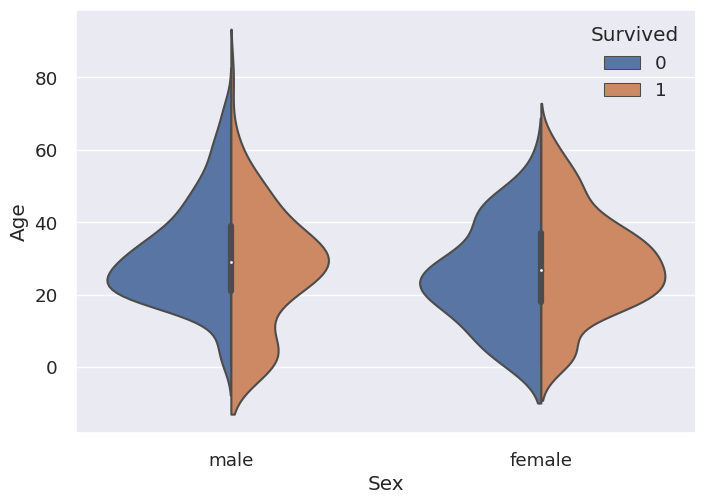

In [21]:
sns.violinplot(data=train, x='Pclass', y='Age', hue='Survived', split=True)
plt.show()
sns.violinplot(data=train, x='Sex', y='Age', hue='Survived', split=True)
plt.show()

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


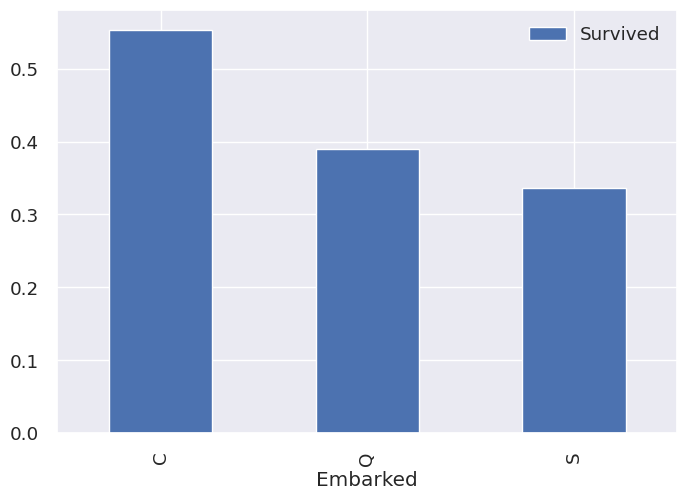

In [22]:
# Embarked
display(pd.crosstab(train['Embarked'], train['Survived'], margins=True))

train[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False).plot(kind='bar')
plt.show()

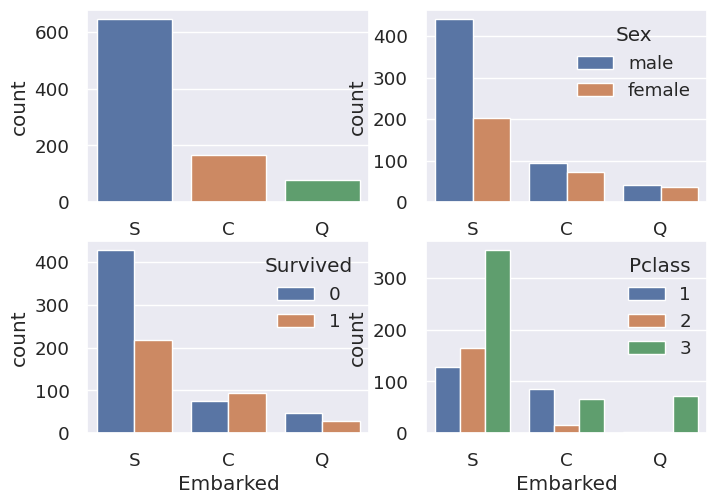

In [23]:
plt.subplot(2, 2, 1)
sns.countplot(data=train, x='Embarked')

plt.subplot(2, 2, 2)
sns.countplot(data=train, x='Embarked', hue='Sex')

plt.subplot(2, 2, 3)
sns.countplot(data=train, x='Embarked', hue='Survived')

plt.subplot(2, 2, 4)
sns.countplot(data=train, x='Embarked', hue='Pclass')

#plt.tight_layout()
plt.show()

In [24]:
train['Family'] = train['SibSp'] + train['Parch'] + 1 # 자기 자신
test['Family'] = test['SibSp'] + test['Parch'] + 1 # 자기자신

In [25]:
display(train['Family'].describe())
display(test['Family'].describe())

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: Family, dtype: float64

count    418.000000
mean       1.839713
std        1.519072
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: Family, dtype: float64

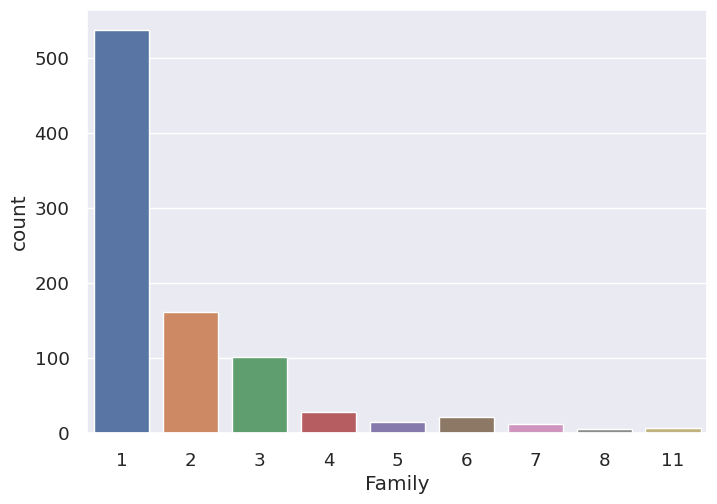

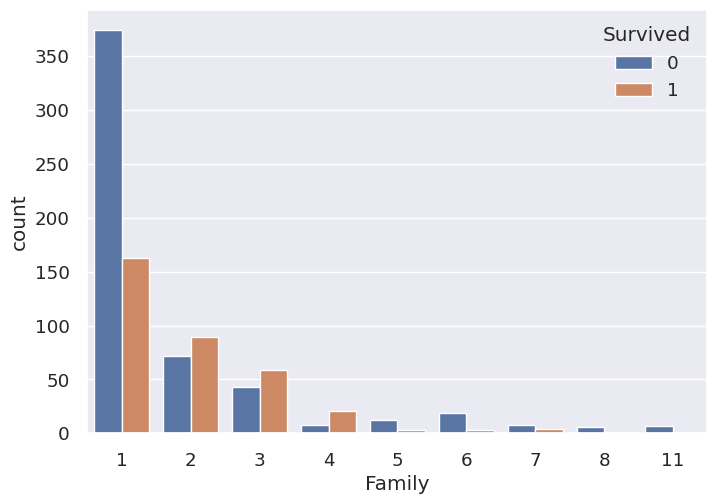

In [26]:
sns.countplot(data=train, x='Family')
plt.show()

sns.countplot(data=train, x='Family', hue='Survived')
plt.show()


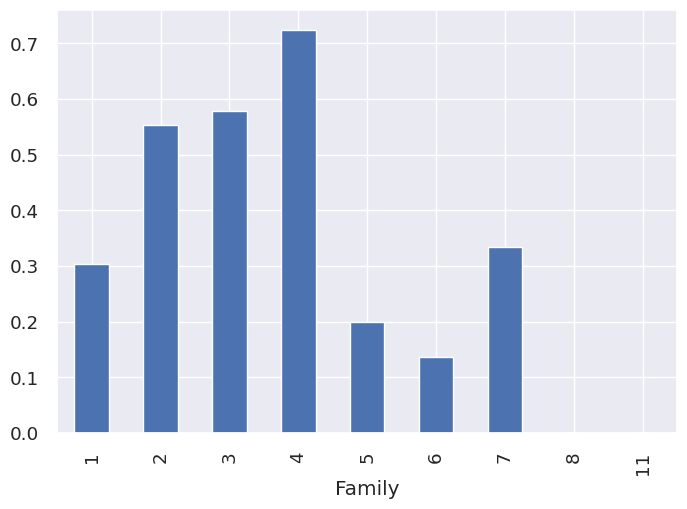

In [27]:
# x = Family
# y = survival rate
train[['Family', 'Survived']].groupby('Family')['Survived'].mean().plot(kind='bar')
plt.show()

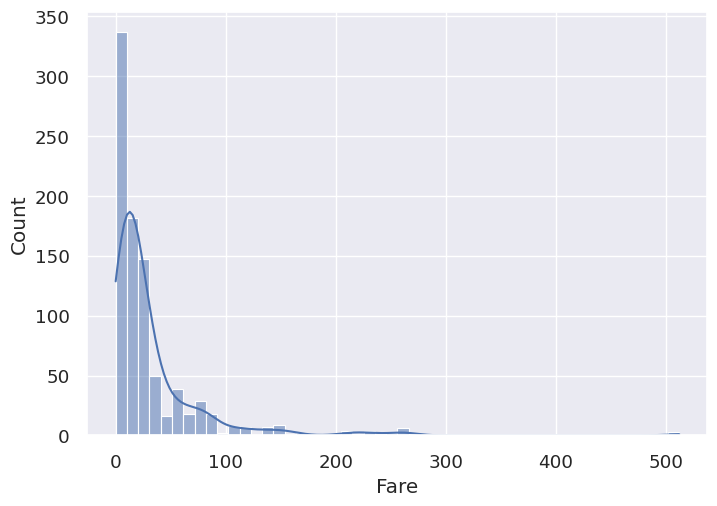

In [28]:
sns.histplot(data=train, x='Fare', kde=True, bins=50)
plt.show()

In [29]:
train['Fare'].skew()

4.787316519674893

In [30]:
# FEATURE ENGINEERING
# # high skewness -(log transform)-> normal distribution
# train['Fare'] = train['Fare'].apply(lambda x : np.log(x))
# test['Fare'] = test['Fare'].apply(lambda x : np.log(x))

In [31]:
train['Fare'].isna().sum()

0

In [32]:
train['Fare'].apply(np.log).skew()

nan

In [33]:
# cabin > too many nan > drop col

In [34]:
# Ticket : family would be same ticket NO?

train[['Ticket', 'Survived']].groupby(by='Ticket', as_index=True).sum() / train[['Ticket', 'Survived']].groupby(by='Ticket', as_index=True).count()

,Survived
Ticket,
110152,1.000000
110413,0.666667
110465,0.000000
110564,1.000000
110813,1.000000
...,...
W./C. 6608,0.000000
W./C. 6609,0.000000
W.E.P. 5734,0.000000


# 3. Feature Engineering

In [35]:
#### 1. fill Nan

In [36]:
# Age : 177 Nan > how to handle it?
#  1) mean: is it good?
#  2) What is in A Name?? -> Feature !

In [37]:
import re

train['Initial'] = train['Name'].str.extract(r'([A-Za-z]+)\.')

In [38]:
test['Initial'] = test['Name'].str.extract(r'([A-Za-z]+)\.')

In [39]:
pd.crosstab(train['Initial'], columns=train['Sex']).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [40]:
# replace misspelled initial
train['Initial'] = train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'])

In [43]:
pd.crosstab(test['Initial'], columns=train['Sex']).T

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,0,1,6,26,95,31,1,0
male,2,1,0,15,52,145,41,0,2


In [44]:
test['Initial'] = test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'])

In [45]:
train['Initial'].unique(), test['Initial'].unique()

(array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object),
 array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object))

In [46]:
avg_age_by_initial = train.groupby(by='Initial')['Age'].mean()

In [47]:
avg_age_by_initial

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [48]:
for initial, avg_age in avg_age_by_initial.items():
    train.loc[(train['Age'].isna()) &(train['Initial']==initial), 'Age'] = avg_age

In [49]:
for initial, avg_age in avg_age_by_initial.items():
    test.loc[(test['Age'].isna()) &(test['Initial']==initial), 'Age'] = avg_age

In [50]:
train['Age'].isna().sum()

0

In [51]:
test['Age'].isna().sum()

0

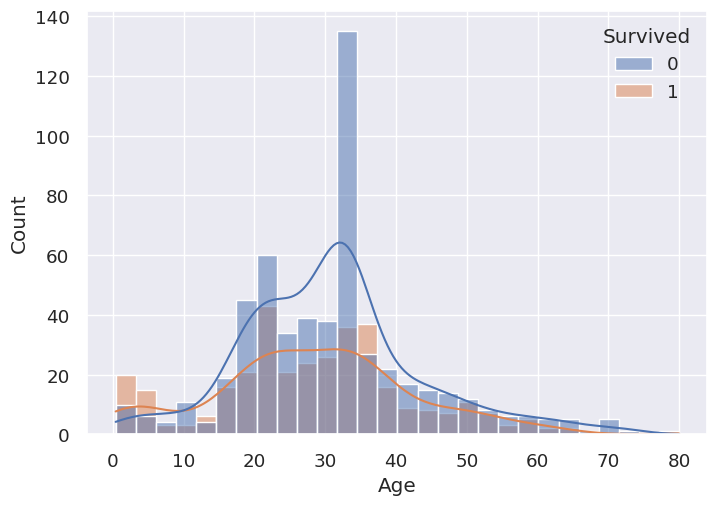

In [52]:
sns.histplot(data=train, x='Age', hue='Survived', common_norm=True, kde=True)
plt.show()

In [53]:
# Embarked : 2 nan > mode

train['Embarked'] = train['Embarked'].fillna('S')

In [54]:
test['Embarked'].isna().sum()

0

In [55]:
# cabin : too many nan > drop col
train = train.drop(columns='Cabin', axis=1)

In [56]:
test=test.drop(columns='Cabin', axis=1)

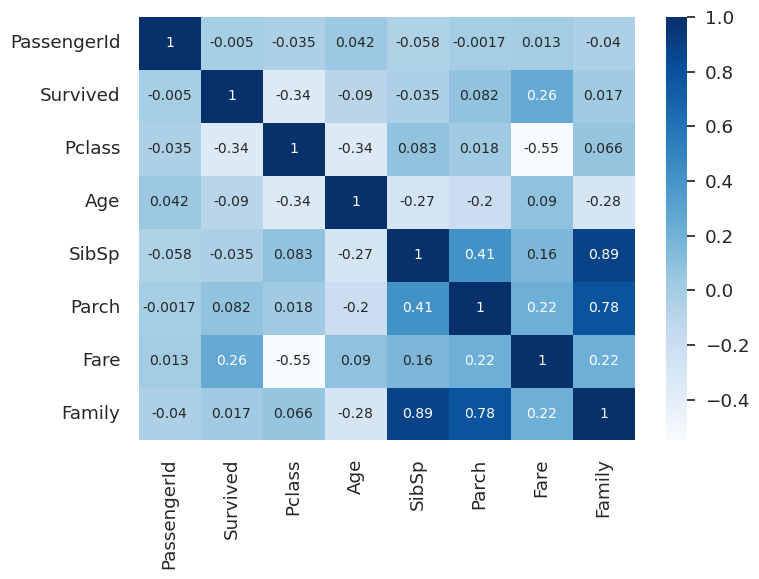

In [57]:
sns.heatmap(train.corr(), cmap='Blues', annot=True, annot_kws={'size':10})
plt.show()

In [58]:
# continous value(AGE) > categorical value(age_band)

# 0~80 age > 5 bins
def age2age_band(age):
    if age <= 16:
        return 0
    elif age <= 32:
        return 1
    elif age <= 48:
        return 2
    elif age <= 64:
        return 3
    else:
        return 4
    

train['Age_band'] = train['Age'].apply(age2age_band)

In [59]:
test['Age_band'] = test['Age'].apply(age2age_band)

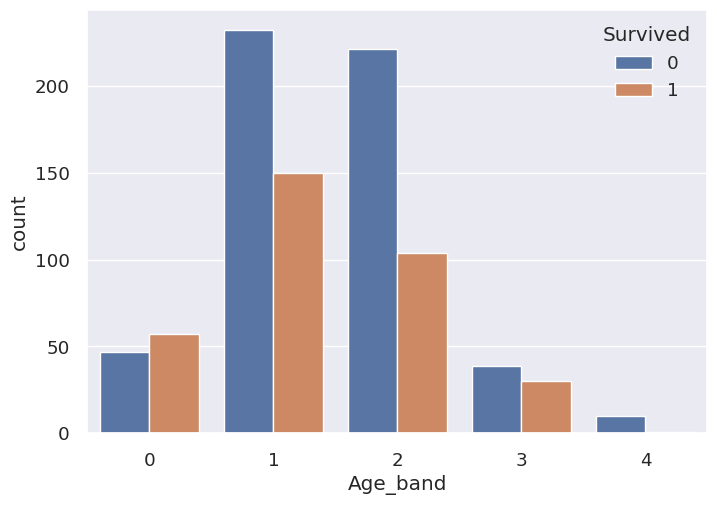

In [60]:
sns.countplot(train, x='Age_band', hue='Survived')
plt.show()

In [61]:
# alone > survived?
train['Alone'] = 0
train.loc[train['Family']==1, 'Alone'] = 1

In [62]:
test['Alone'] = 0
test.loc[test['Family']==1, 'Alone'] = 1

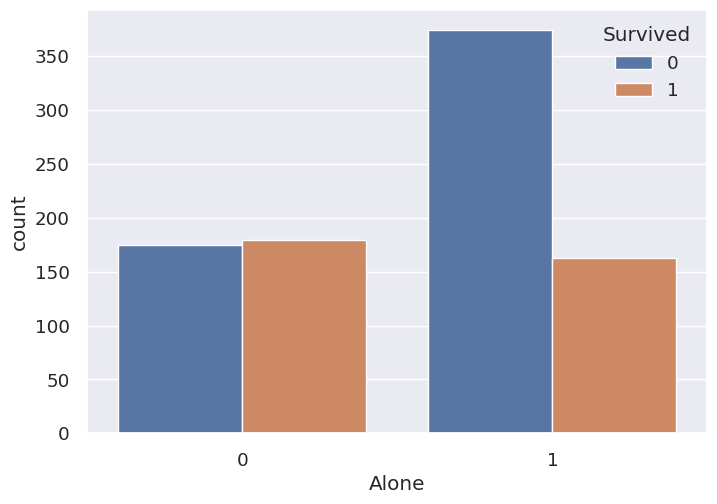

In [63]:
sns.countplot(data=train, x='Alone', hue='Survived')
plt.show()

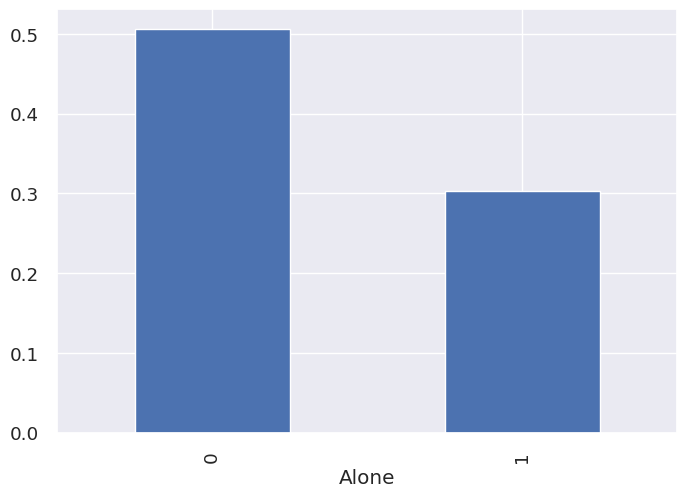

In [64]:
train[['Alone', 'Survived']].groupby(by='Alone', as_index=True)['Survived'].mean().plot(kind='bar')
plt.show()

In [65]:
# Fare(numerical) > Fare Range > survived ?
train['Fare_range'] = pd.qcut(train['Fare'], 4)

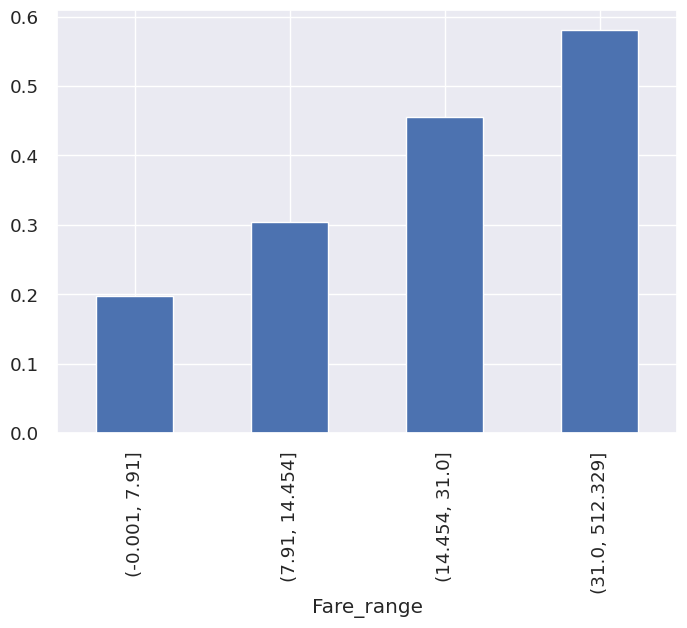

In [66]:
train[['Fare_range', 'Survived']].groupby('Fare_range')['Survived'].mean().plot(kind='bar')
plt.show()

In [67]:
def fare2fare_cat(fare):
    if fare <= 7.91:
        return 0
    elif fare <= 14.456:
        return 1
    elif fare <= 31.0:
        return 2
    else:
        return 3
    
train['Fare_cat'] = train['Fare'].apply(fare2fare_cat)

In [68]:
test['Fare_cat'] = test['Fare'].apply(fare2fare_cat)

In [69]:
# string features > cateogircal features

# ['female', 'male']
# Embarked: ['C', 'Q', 'S']
# ['Master', 'Miss', 'Mr', 'Mrs', 'Other']
sex_mapper = dict(
    female = 0,
    male = 1
)

embarked_mapper = dict(
    C=0,
    Q=1,
    S=2
)

initial_mapper = dict(
    Master= 0,
    Miss=1,
    Mr=2,
    Mrs=3,
    Other=4
)

In [70]:
# sex, Embarked, Initial
train['Sex'] = train['Sex'].replace(sex_mapper)
train['Embarked'] = train['Embarked'].replace(embarked_mapper)
train['Initial'] = train['Initial'].replace(initial_mapper)

test['Sex'] = test['Sex'].replace(sex_mapper)
test['Embarked'] = test['Embarked'].replace(embarked_mapper)
test['Initial'] = test['Initial'].replace(initial_mapper)

In [71]:
# drop cols
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Fare_range']

train = train.drop(columns=drop_cols, axis=1)

In [72]:
test_id = test[['PassengerId']]

test = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [73]:
set(train.columns) - set(test.columns)

{'Survived'}

In [74]:
train['Initial'].unique(), train['Initial'].unique()

(array([2, 3, 1, 0, 4]), array([2, 3, 1, 0, 4]))

In [75]:
# dum cols
dum_cols = ['Initial', 'Embarked']

train = pd.get_dummies(train, columns=dum_cols, drop_first=True)
test = pd.get_dummies(test, columns=dum_cols, drop_first=True)

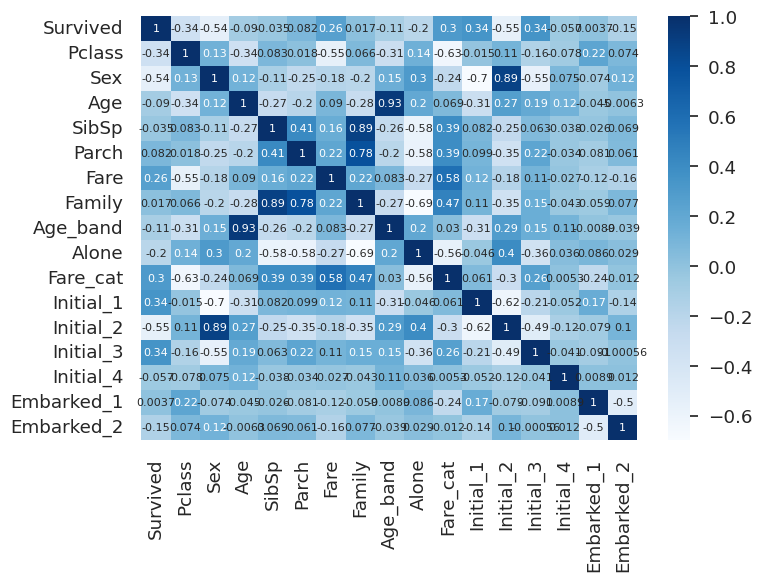

In [76]:
sns.heatmap(train.corr(), cmap='Blues', annot=True, annot_kws={'size':8})
plt.show()

In [78]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Age_band,Alone,Fare_cat,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_1,Embarked_2
0,0,3,1,22.0,1,0,7.2500,2,1,0,0,0,1,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,2,2,0,3,0,0,1,0,0,0
2,1,3,0,26.0,0,0,7.9250,1,1,1,1,1,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,2,2,0,3,0,0,1,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,2,1,1,0,1,0,0,0,1


In [79]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Age_band,Alone,Fare_cat,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_1,Embarked_2
0,3,1,34.5,0,0,7.8292,1,2,1,0,0,1,0,0,1,0
1,3,0,47.0,1,0,7.0000,2,2,0,0,0,0,1,0,0,1
2,2,1,62.0,0,0,9.6875,1,3,1,1,0,1,0,0,1,0
3,3,1,27.0,0,0,8.6625,1,1,1,1,0,1,0,0,0,1
4,3,0,22.0,1,1,12.2875,3,1,0,1,0,0,1,0,0,1


In [94]:
import joblib
joblib.dump(train, 'trainset.csv')
joblib.dump(test, 'testset.csv')

['testset.csv']

# 4. Modeling

# 5. Training & Tuning

# 6. Evaluation